#**Stock Market Prediction using machine learing.**

For doing the stock market prediction, we are taking 20 years HDFC stocks results from 2000-01-03 to 2020-08-31. 

Stride:



1.   Loading Libraries
2.   Loading dataset
3.   Visualization of data
4.   Preprocessing of data
5.   Train and Test Split
6.   Building Model
7.   Optimization and Hyperparameter tuning
8.   Prediction

This file will contain bottom 4 strides and the top 4 strides are in Stock_market_prediction_Preprocessed file.








Firstly we will load the preprocessed HDFC stock file.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#setting figure size
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 20,10

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

In [ ]:
data=pd.read_csv('HDFC-Preprocessed.csv')

In [ ]:
data

,Date,Close,Scaled_closing_price
0,2000-01-03,293.50,0.003332
1,2000-01-04,304.05,0.006974
2,2000-01-05,292.80,0.003090
3,2000-01-06,296.45,0.004350
4,2000-01-07,286.55,0.000932
...,...,...,...
5136,2020-08-25,1829.60,0.533698
5137,2020-08-26,1816.00,0.529003
5138,2020-08-27,1864.10,0.545610
5139,2020-08-28,1883.25,0.552222


In [ ]:
new_data = data.drop('Close',axis=1)

In [ ]:
#setting index as date
new_data.index = new_data.Date
new_data.drop('Date', axis=1, inplace=True)

In [ ]:
new_data

,Scaled_closing_price
Date,
2000-01-03,0.003332
2000-01-04,0.006974
2000-01-05,0.003090
2000-01-06,0.004350
2000-01-07,0.000932
...,...
2020-08-25,0.533698
2020-08-26,0.529003
2020-08-27,0.545610


In [ ]:
values=new_data.values

In [ ]:
values=np.array(values)
values.shape

(5141, 1)

For inverse transform 

In [ ]:
#for normalizing data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(values)

We are going to use scaled_closing_price from our dataframe.
and will classify them in train and test


##**5. Train and Test Split**

We are going to start splitting data in the span of 30 days closing price that is we will use past 30 days data to predict future prices and as mentioned in the problem statement we will be predicting 10 days future prices.

If we get good results from 30 days then we will proceed otherwise we will check it for 60 days.

In [ ]:
train = new_data[:4112] #approx 80% of the data will be train set
test =  new_data[4112:] # 20% of data will be test set

In [ ]:

x_train, y_train = [], []
for i in range(30,len(train)):
    x_train.append(values[i-30:i,0])
    y_train.append(values[i,0])
x_train, y_train = np.array(x_train), np.array(y_train)

#x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))

In [ ]:
inputs = new_data[len(new_data) - len(test) - 30:].values
inputs = inputs.reshape(-1,1)

X_test,y_test = [],[]
for i in range(30,inputs.shape[0]):
    X_test.append(inputs[i-30:i,0])
    y_test.append(inputs[i,0])
X_test = np.array(X_test)
y_test=np.array(y_test)

#X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))

In [ ]:
x_train.shape

(4082, 30)

#**6. Building Model**

We are setting Linear Regression Model as our baseline model.

Linear Regression model

and we will see the rmse value for comparison

In [ ]:
from sklearn.linear_model import LinearRegression 
regressor = LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
#make predictions 
closing_price = regressor.predict(X_test)
closing_price=closing_price.reshape(-1,1)
closing_price = scaler.inverse_transform(closing_price)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


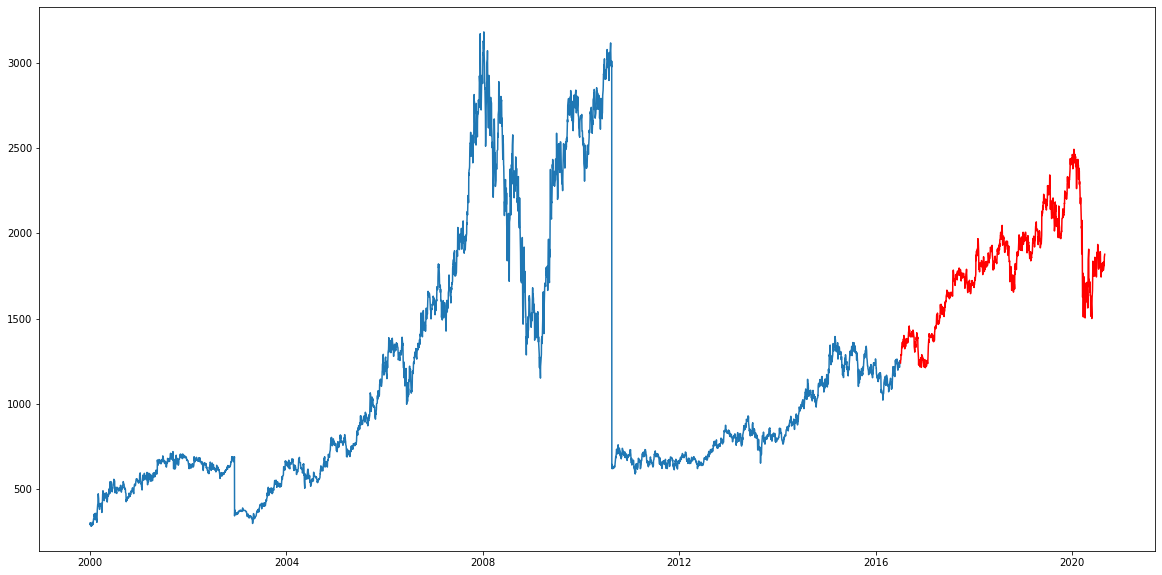

In [ ]:
test['Predictions'] = closing_price
plt.plot(train['Close'])
plt.plot(test[['Close','Predictions']],'r');

In [ ]:
import math
from sklearn.metrics import mean_squared_error
train_predict=regressor.predict(x_train)
math.sqrt(mean_squared_error(y_train,train_predict))

0.017554711372046172

**Moving Average**

In [ ]:
from datetime import datetime
df = pd.read_csv('HDFC-Preprocessed.csv')

print(df.head())
print('\n Shape of the data:')
print(df.shape)

df['Date'] = pd.to_datetime(df.Date,format='%Y-%m-%d')
df.index = df['Date']

data = df.sort_index(ascending=True, axis=0)
new_data = pd.DataFrame(index=range(0,len(df)),columns=['Date', 'Close'])

for i in range(0,len(data)):
     new_data['Date'][i] = data['Date'][i]
     new_data['Close'][i] = data['Close'][i]

train = new_data[:4112]
valid = new_data[4112:]

print('\n Shape of training set:')
print(train.shape)

print('\n Shape of validation set:')
print(valid.shape)

preds = []
for i in range(0,valid.shape[0]):
  a=valid['Close'][i:200+i].sum()
  b=a/200
  preds.append(b)

         Date   Close  Scaled_closing_price
0  2000-01-03  293.50              0.003332
1  2000-01-04  304.05              0.006974
2  2000-01-05  292.80              0.003090
3  2000-01-06  296.45              0.004350
4  2000-01-07  286.55              0.000932

 Shape of the data:
(5141, 3)

 Shape of training set:
(4112, 2)

 Shape of validation set:
(1029, 2)


In [ ]:
preds

In [ ]:
valid.index=valid['Date']
valid

In [ ]:
train.index=train['Date']
train

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


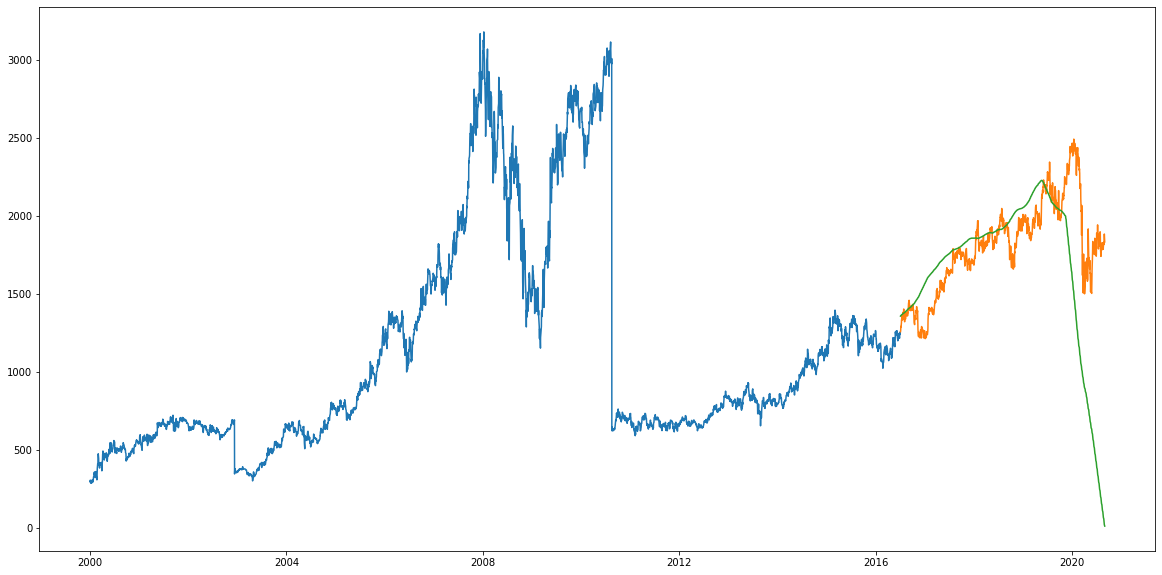

In [ ]:
valid['Predictions'] = 0
valid['Predictions'] = preds
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])

In [ ]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(valid['Close'],preds))

516.0527117530019

As we can see the moving average is not performing well as it highly depend upon previous value's average. so, it couldn't interpret the high peak that has been there.

Deep Learning - LSTM 
Model Building

In [ ]:
x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))

In [ ]:
import tensorflow as tf
from tensorflow.keras import Sequential    # import Sequential from tensorflow.keras
from tensorflow.keras.layers import Dense, Dropout, LSTM  # import Dense from tensorflow.keras.layers
from numpy.random import seed  

In [ ]:
# create and fit the LSTM network
model = tf.keras.Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(units=50))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(x_train, y_train, epochs=2, batch_size=30, verbose=1)

Epoch 1/2
137/137 [==============================] - 4s 29ms/step - loss: 0.0039
Epoch 2/2
137/137 [==============================] - 4s 30ms/step - loss: 0.0014


In [ ]:
closing_price = model.predict(X_test)


closing_price
closing_price = scaler.inverse_transform(closing_price)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


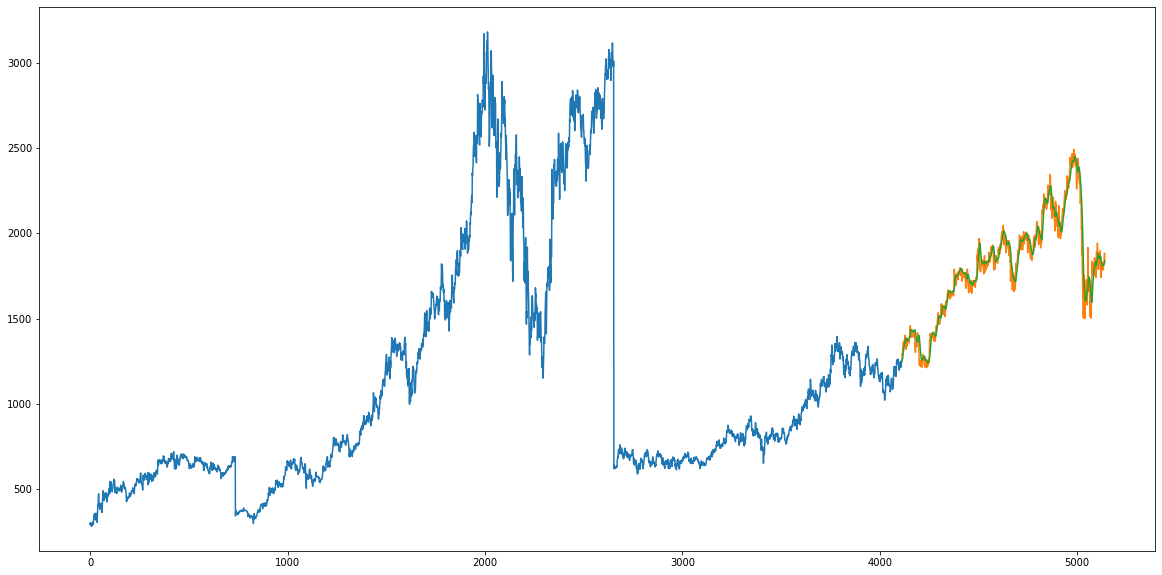

In [ ]:
train = data[:4112]
valid = data[4112:]
valid['Predictions'] = closing_price
plt.plot(train['Close'])
plt.plot(valid[['Close','Predictions']]);

#**Optimization and Hyperparameter Tuning** 

In [ ]:
x_train, y_train = [], []
for i in range(60,len(train)):
    x_train.append(values[i-60:i,0])
    y_train.append(values[i,0])
x_train, y_train = np.array(x_train), np.array(y_train)

x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))

In [ ]:
inputs = new_data[len(new_data) - len(test) - 60:].values
inputs = inputs.reshape(-1,1)

X_test = []
for i in range(60,inputs.shape[0]):
    X_test.append(inputs[i-60:i,0])
X_test = np.array(X_test)

X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))

In [ ]:
x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))

In [ ]:

# create and fit the LSTM network
model = tf.keras.Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(60,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(x_train, y_train, epochs=10, batch_size=30, verbose=1)

Epoch 1/10
136/136 [==============================] - 11s 79ms/step - loss: 0.0064
Epoch 2/10
136/136 [==============================] - 12s 87ms/step - loss: 0.0018
Epoch 3/10
136/136 [==============================] - 12s 86ms/step - loss: 0.0015
Epoch 4/10
136/136 [==============================] - 11s 84ms/step - loss: 0.0016
Epoch 5/10
136/136 [==============================] - 12s 86ms/step - loss: 0.0011
Epoch 6/10
136/136 [==============================] - 12s 86ms/step - loss: 9.2231e-04
Epoch 7/10
136/136 [==============================] - 12s 86ms/step - loss: 9.2132e-04
Epoch 8/10
136/136 [==============================] - 11s 84ms/step - loss: 7.6410e-04
Epoch 9/10
136/136 [==============================] - 12s 86ms/step - loss: 6.9371e-04
Epoch 10/10
136/136 [==============================] - 11s 84ms/step - loss: 6.0776e-04


In [ ]:
data['Date'] = pd.to_datetime(data.Date,format='%Y-%m-%d')
data.index = data['Date']

In [ ]:
closing_price = model.predict(X_test)
closing_price = scaler.inverse_transform(closing_price)
closing_price

array([[1250.3151],
       [1255.2281],
       [1260.3564],
       ...,
       [1862.3575],
       [1874.9617],
       [1894.6813]], dtype=float32)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


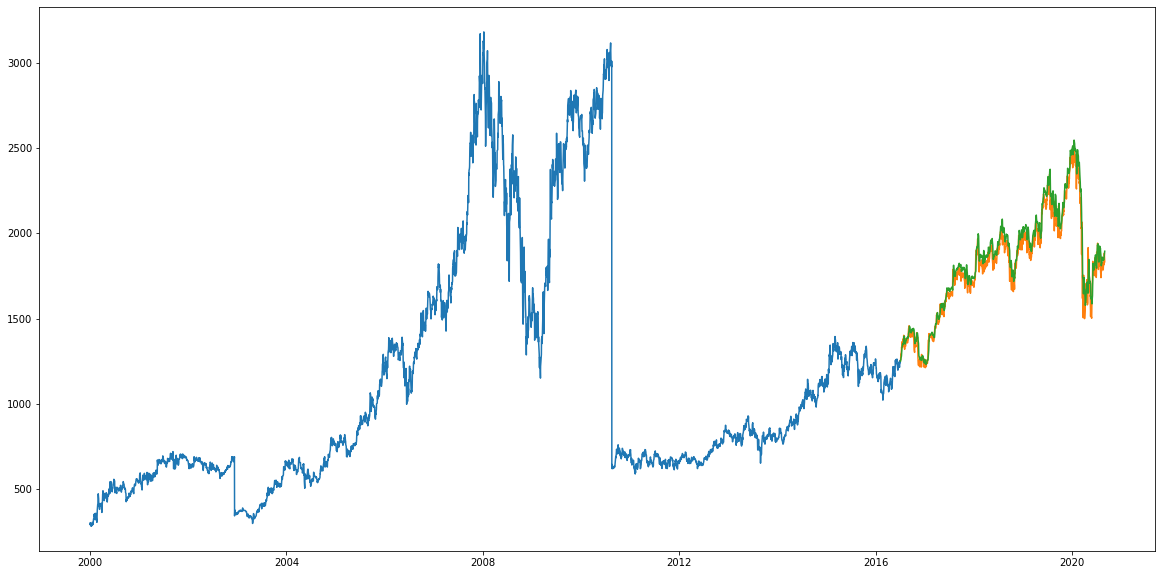

In [ ]:

train = data[:4112]
valid = data[4112:]
valid['Predictions'] = closing_price
plt.plot(train['Close'])
plt.plot(valid[['Close','Predictions']]);

In [ ]:
train_predict=model.predict(x_train)
#train_predict=scaler.inverse_transform(train_predict)
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

0.024241357807022232

In [ ]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

#**Prediction**

1 day output [[1709.119]]
2 day output [[1725.7922]]
3 day output [[1746.3138]]
4 day output [[1766.9338]]
5 day output [[1786.2156]]
6 day output [[1803.7695]]
7 day output [[1819.6552]]
8 day output [[1834.151]]
9 day output [[1847.6532]]
10 day output [[1860.6]]


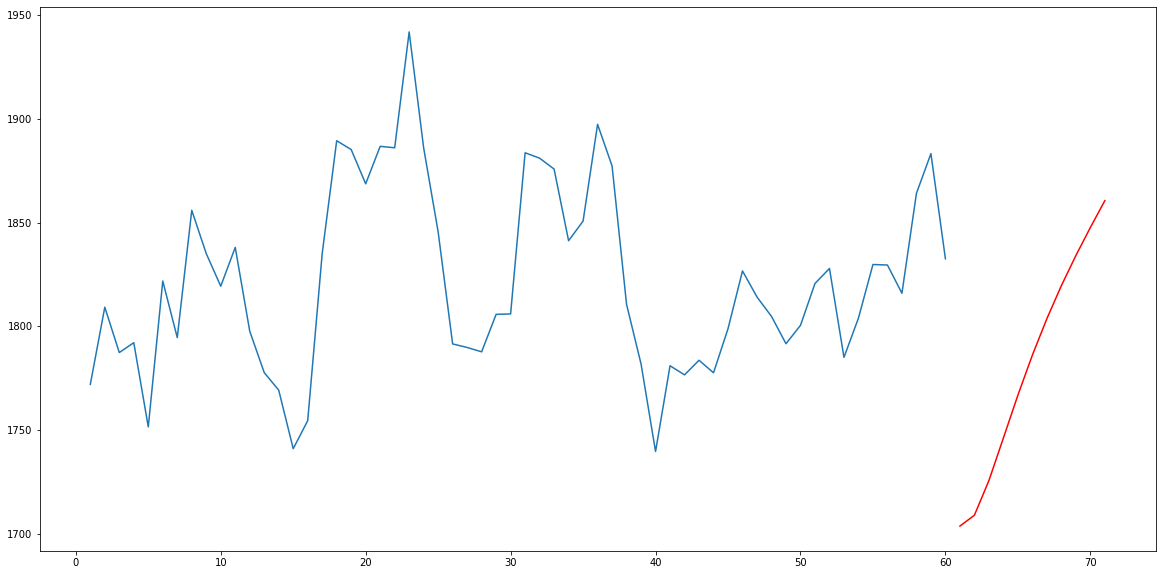

In [ ]:
x_input=X_test[340].reshape(1,-1)
x_input.shape

temp_input=list(x_input)
temp_input=temp_input[0].tolist()

from numpy import array

lst_output=[]
n_steps=60
i=0
while(i<11):
    
    if(len(temp_input)>60):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        #print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,scaler.inverse_transform(yhat)))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        #print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        #print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

#print(lst_output)


day_new=np.arange(1,61)
day_pred=np.arange(61,72)
plt.plot(day_new,scaler.inverse_transform(new_data[5081:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output),'r')


